In [1]:
from HB import Butterfly, load_pickle, save_pickle
from structure2pybinding import structure2pybinding
from ase.io import read


## 1. Creating a pybinding-lattice object

Reading in a ASE readable file (for example a .cif file) and creating a pybinding-lattice object that contains all the pp-pi hoppings and on-site elements from the slater-koster files.

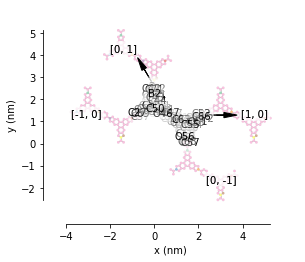

In [2]:
structure = read('structures/COF-5.cif')
slako_path = 'path/to/slakos/matsci-0-3'
pb_lattice = structure2pybinding(structure, slako_path)
pb_lattice.plot()

## 2. Initializing Butterfly object


In [3]:
params = {'emin': -16,  # energy minimum [eV]
            'emax': 5,  # energy maximum [eV]
            'enum': 1000,  # number of energy steps
            'Bmin': 0,  # B minimum [T]
            'Bmax': 240000,  # B maximum [T]
            'Bnum': 1000,  # number of B steps
            'num_cores': 4,  # number of cores to use
            'a1': 50,  # supercell-size a1xa2
            'a2': 50,  # supercell-size a1xa2
            'broadening': 0.0005,  # broadening for kpm method
            'num_random': 3  # number of random vectors for kpm method
         }

HB = Butterfly(pb_lattice, params)

Broadening is 0.0005 which is smaller than the set energy resolution (0.021).

Setting broadening to 0.021


## 3. Calculation of Butterfly spectrum
Calculating the butterfly spectrum. The class instance can then be saved as a pickle, so that it can be retrieved afterwards again without recalculating the spectrum.

In [4]:
HB.create_butterfly()  # can take a couple of minutes
save_pickle(HB, 'COF-5.pkl')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.0min
[Parallel(

In [5]:
HBloaded = load_pickle('COF-5.pkl')  # reload saved pickle file

## 4. Plotting Butterfly spectrum

Using Eshift=5.857357357357355 to shift energy scale.


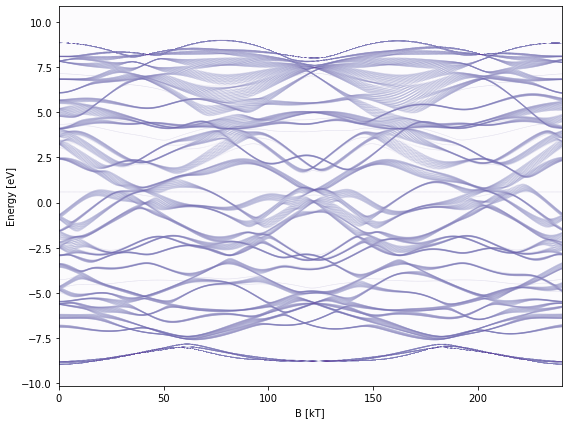

In [7]:
HBloaded.get_Eshift()  # calculating the Energy-shift to center spectrum
fig, ax = HBloaded.plot(kT=True)
fig.savefig('COF-5_butterfly.pdf', dpi=600)
